# Генетический алгоритм

In [41]:
import numpy as np 
import random

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import LogNorm
import matplotlib
from matplotlib import cm
import matplotlib.gridspec as gridspec
import seaborn as sns

import copy
from tqdm import tqdm

plt.style.use('ggplot')
%matplotlib inline
%config InlineBackend.figure_format ='retina'

from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 8

*Генетический алгоритм* (*genetic algorithm*, GA) является одним из самых популярных типов эволюционных алгоритмов, которые — как можно понять из их названия, — используют теорию эволюции, в частности теорию Дарвина, в решении той или иной оптимизационной задачи. Суть алгортима заключается в поиске наилучшего решения по принципу естественного отбора: случайным образом создается поколение, в ходе эволюции которого происходит скрещевание генов — таким образом, появлется новое поколение (старые особи создают потомков) — и их мутация.

## Алгоритм

Рассмотрим задачу нахождения глобального минимума функции~$f \colon \mathbb{R}^n \to \mathbb{R}$:

$$
	\mathop{\mathrm{argmin}}_{x \in \mathbb{R}^n}f(x),
$$

где каждая особь кодируется вектором $x = (x_1, ..., x_n)$, называемым хромосомой, компоненты которого являются генами.

Пусть у нашего поколения, или популяции, $P$ есть $\ell$ особей. Тогда поколение в момент времени $t$ примет следующий вид:

$$
	P_t = \{x_{i,t}\}_{i=1}^\ell,
$$

где у кажой хромосомы имеется $n$ генов: $x_{i, t} = (x_{i1,t}, ..., x_{in, t})$

Теперь рассмотрим сам алгоритм:

1. Генерируем первое поколение особей случайным образом:

$$
P_0 = \{x_{1, 0}, ..., x_{\ell, 0} \ \colon \ (x_{i1, 0}, ..., x_{in, 0}) \in D, \  x_{ij, 0} \sim U(a, b)\},
$$

где $D = \{(x_1, ..., x_n) \in \mathbb{R}^n \ \colon \  a < x_i < b \}$, $a,\ b \in \mathbb{R}$ — заданная область оптимизации (гиперкуб или гиперпрямоугольник).

2. Оцениваем приспособленность (fitness) текущего поколения.

Сначала вычисляем значения целевой функции  для каждой особи:

$$
F_t = \{f(x_{i,t})\}_{i=1}^\ell.
$$

Затем используем такое преобразование $\sigma$, что все комоненты $F_t$ будут лежать на отрезке $[0, 1]$:

$$
\sigma(z) = \dfrac{z - F^{worst}}{F^{best} - F^{worst}},
$$
 где $F^{best}$, $F^{worst}$ — лучшее и худшее значения целевой функции в текущем поколении соответственно.

Таким образом, получим значения приспособленности особей:

$$
F'_t = \{\sigma(f(x_{i, t}))\}_{i=1}^\ell.
$$

3. Отбирем $k$ наиболее преспособленных особей для дальнейшего размножения.

Будем считать, что особь $x'$ более приспособлена, чем особь $x''$, если

$$
\sigma(f(x')) > \sigma(f(x'')).
$$

Ранжируем особи в текущей популяции по значениям их приспособленности в порядке убывания, то есть от самых приспособленных к самым неприспособленным:

$$
\sigma(f(x^{(1)}_t)) \geq ... \geq \sigma(f(x^{(k)}_t)) \geq ... \geq \sigma(f(x^{(\ell)}_t)).
$$

4. Скрещиваем (crossover) k наиболее приспособленных особей со всеми остальными. Так мы распространяем "хорошие"" гены по популяции.

Под скрещиванием будем иметь в виду операцию создания новой особи, — более точно ее хромосомы, — у которой часть генов будет от преспособленной особи $x^{m}$, $m \in (1, ..., k)$  вероятностью $\mathbb{P}(\{y_i = x^{m}_i\})$, а часть от особи $x$ с вероятностью $\mathbb{P}(\{y_i = x_i\})$.

$$
\exists x^{m}_t, x_t \in D \colon \Psi(x^{m}_t, x_t) = y_{t + 1} = (y_{1,t + 1}, ..., y_{n, t + 1}),
$$

где $\Psi$ — оператор скрещивания особей $x^{m}$ и $x$ для получения особи $y$. Ее компоненты получаются следующим образом:

$$
y_i
=
\begin{cases}
x^{m}_i, \ \text{с вероятностью}~\mathbb{P}(\{y_i = x^{m}\}) = \dfrac{\sigma(f(x^{m}))}{\sigma(f(x^{m})) + \sigma(f(x))} \\
x_i, \ \text{с вероятностью}~\mathbb{P}(\{y_i = x_i\}) = \dfrac{\sigma(f(x))}{\sigma(f(x^{m})) + \sigma(f(x))}
\end{cases}.
$$

Заметим, что,

$$
\mathbb{P}(\{y_i = x^{m}_i\}) + \mathbb{P}(\{y_i = x_i\})
=
\dfrac{\sigma(f(x^{m}))}{\sigma(f(x^{m})) + \sigma(f(x))}
+
\dfrac{\sigma(f(x))}{\sigma(f(x^{m})) + \sigma(f(x))}
=
1.
$$

Также стоит отметить, что обычно гены более приспособленной особи $x^{m}$ чаще присваиваются, нежели случайно выбранной особи. Это объясняется тем, что в большенстве случаев вероятность получения гена приспособленной особи превышает вероятность получения гена случайно выбранной.

* Некоторых особей в текущей популяции — кроме лучшей, то есть $x_t^{(1)}$, — подвергнем мутации. Оператор мутации меняет произвольное количество генов в хромосоме особи на другие — однако довольно близкие к исходным, — гены.

$$
\exists x_t \in D\colon \Upsilon(x_t) = \hat{x}_{t+1},
$$

где $\Upsilon$ — оператор мутации, $x$ — мутируемая особь.

Если ген в хромосоме подвергается мутации, то он принимает следующий вид:

$$
\hat{x}_i
= x_i + \delta_i \in D.
$$

5. Перходим к пункту 2, пока не выполнен критерий останова.
  Приведем несколько примеров критерия останова:
    
    * Ограничить максимально возможное количество поколений (количество эволюций популяции).
	*  Задать минимальную точность приближения.


## Функция Экли

Функция Экли также, как и функция Розенброка, используется в качестве оценки производительности оптимизационных алоритмов. Она имеет следующий вид:

$$
f(x_1, ..., x_n)
=
20
+
e
-20\exp\left\{-0.2
\sqrt{\dfrac{1}{n}
\sum_{i=1}^n \limits x^2_i}
\right\}
-
\exp\left\{
\dfrac{1}{n}
\sum_{i=1}^n \limits
\cos(2\pi x_i)
\right\}.
$$

Будем рассматривать трехмерный случай. Тогда глобальный минимум функции Экли достигается в точке $(x, y) = (0, 0)$ со значением целевой функции $f(0, 0) = 0$.

In [10]:
def ackley_func(x, y):
    return 20 + np.exp(1) - 20*np.exp(-0.2*np.sqrt(0.5*(x**2+y**2))) - np.exp(0.5*(np.cos(2*np.pi*x)+np.cos(2*np.pi*y)))

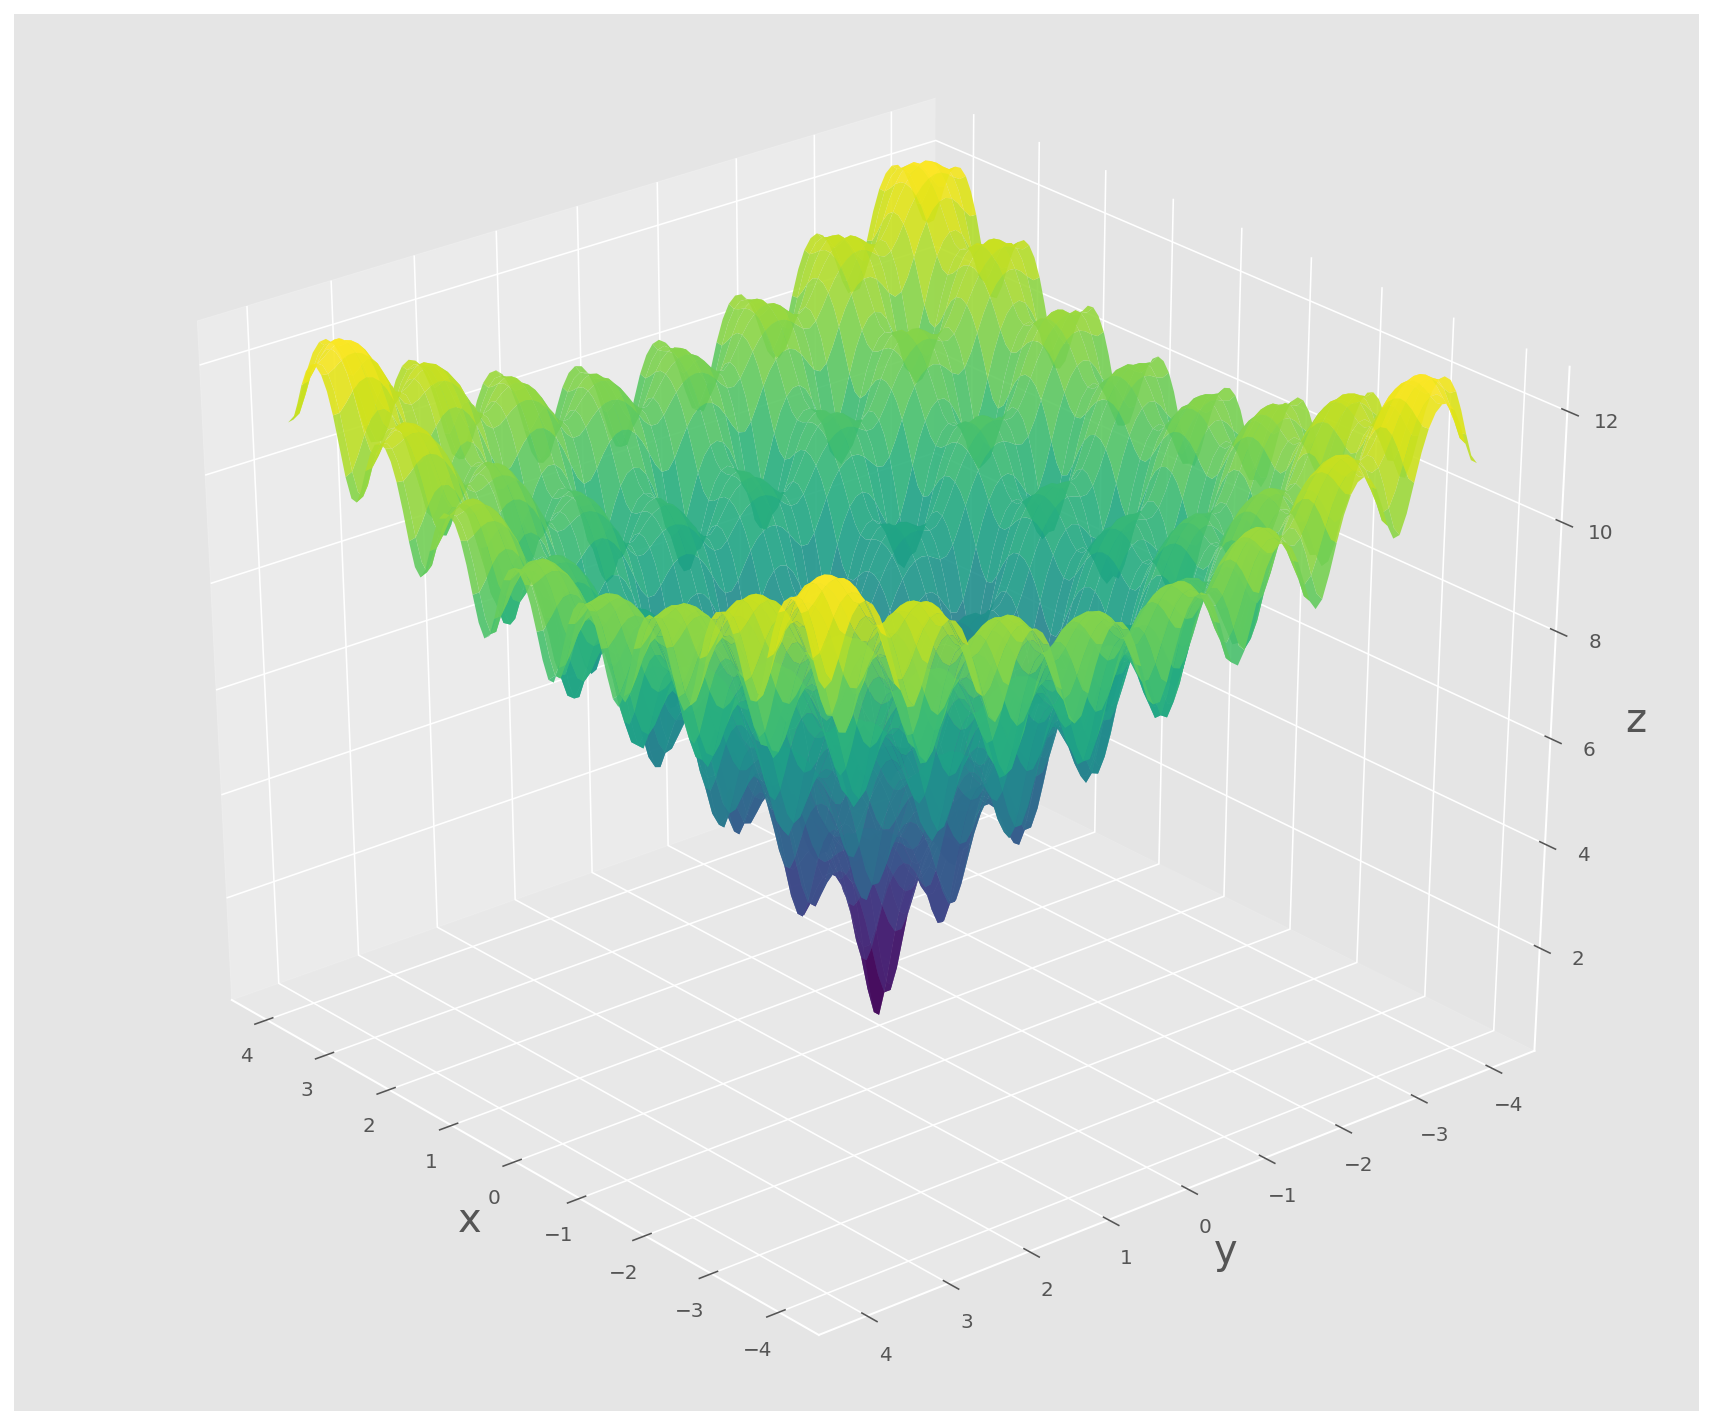

In [11]:
fig = plt.figure(figsize=(12,10))

# Make grid
x = np.linspace(-4, 4, 100)
y = np.linspace(-4, 4, 100)
X, Y = np.meshgrid(x, y)
Z = ackley_func(X, Y)

# Plot the surface
ax = fig.add_subplot(1, 1, 1, projection='3d')
#norm = matplotlib.colors.Normalize(vmin = 0, vmax = 100, clip = True)
#ax.plot_surface(X, Y, Z, alpha=0.8, cmap='viridis_r', norm=norm)
ax.plot_surface(X, Y, Z, alpha=0.9, cmap='viridis', )
ax.set_xlabel('x', fontsize=20)
ax.set_ylabel('y', fontsize=20)
ax.set_zlabel('z', fontsize=20)

ax.view_init(30, 140)

plt.tight_layout()

Определим функцию Экли:

In [12]:
def ackley_func(x):
    part_1 = 20 * np.exp(-0.2 * np.sqrt(0.5 * (x[0] ** 2 + x[1] ** 2)))
    part_2 = np.exp(0.5 * (np.cos(2 * np.pi * x[0]) + np.cos(2 * np.pi * x[0])))
    return 20 + np.exp(1) - part_1 - part_2

In [13]:
class Individual:
    def __init__(self, search_space, chromosome_len):
        self.search_space = search_space
        self.chromosome_len = chromosome_len 
        self.chromosome = np.array([self.create_gene(j) for j in range(chromosome_len)])
        self.target_value = None # значение целевой функции, используя данную особь
        self.fitness = None # значение приспособленности особи относительно других
        self.name = '#' + ''.join(map(str, np.random.randint(0,9, size=7).tolist()))
    
    def create_gene(self, pos):
        return np.random.uniform(self.search_space[pos][0], 
                                 self.search_space[pos][1])
    
    def __repr__(self):
        chromosome = '; '.join(list(map(str, a.fittest_indivdual.chromosome.tolist())))
        return f'{self.name}: chromosome = ({(chromosome)}); target_value = {self.target_value}'

In [25]:
class GeneticAlgorithm:
    def __init__(self, ell=1000, k=200, mutation_rate=0.1, max_iter=100):
        """
        PARAMETERS:
        ell — количество особей в поколении
        k — количество особей для размножения
        mutation_rate — максимальная мутация гена
        max_iter — максимальное количество эволюций поколения (новых поколений)
        """
        self.ell = ell
        self.k = k
        self.mutation_rate = mutation_rate
        self.max_iter = max_iter
        
        self.search_space = None 
        self.chromosome_len = None # длина хромосомы особи
        self.best_individuals = None # k наиболее приспособленных особей
        self.fittest_indivdual = None # самая приспособленная особь
        self.population = None
        self.best_target_value_history = None
        
    def search_global(self, search_space, func):
        """
        INPUT:
        search_space — область поиска оптимума. Задается как список из кортежей, где 
        кортеж — это область значений одного аргумента функции
        """        
        self.search_space = np.array(search_space)
        self.chromosome_len = len(self.search_space)
        self.best_target_value_history = []

        # создаем первое поколение
        self.population = self.create_population(self.search_space)
        
        # проходим этапы эволюции
        for i in tqdm(range(self.max_iter)):
            # оцениваем приспособленность наших особей
            self.evaluate_population(func)
            # отбираем k наиболее наиболее приспособленных особей
            self.selection()
            
            self.best_target_value_history.append(self.fittest_indivdual.target_value)
            # формируем новые поколения
            # скрещиваем особи
            for idx in range(self.k, self.ell):
                # случайно выбираем одну из наилучших особей
                select_fitted_individual = np.random.choice(self.best_individuals)
                # создаем потомка и заменяем им старую особь
                offspring = self.crossover(select_fitted_individual,
                                           self.population[idx])
                self.population[idx].chromosome = offspring
            
            # мутируем все особи, кроме самой приспособленной
            for individual in self.population[1:]:
                self.mutate(individual)
        
        return self.fittest_indivdual
            
    def create_population(self, search_space):
        """
        INPUT:
        search_space — область поиска оптимума. Задается как список из кортежей, где 
        кортеж — это область значений одного аргумента функции
        """
        self.search_space = np.array(search_space)
        self.chromosome_len = len(self.search_space)

        return np.array([Individual(self.search_space,
                                    self.chromosome_len) for i in range(self.ell)])

    def evaluate_population(self, func):
        """        
        INPUT:
        func — оптимизируемая функция, которая принимает список в качестве аргументов
        """
        F = []
        
        for individual in self.population:
            individual.target_value = func(individual.chromosome)
            F.append(individual.target_value)

        for individual in self.population:
            individual.fitness = self.normalize(individual.target_value,
                                                min(F), max(F))

    def normalize(self, z, F_best, F_worst):
        """
        Нормализует значения целевой функции
        
        INPUT:
        z — масштабируемое значение
        F_best — лучшее значение целевой функции
        F_worst — худшее значение целевой функции
        """
        return (z - F_worst) / (F_best - F_worst)

    def selection(self):
        """
        Оператор отбора
        """
        self.population = sorted(self.population,
                                 key=lambda individual: individual.fitness, reverse=True)
        self.best_individuals = self.population[:self.k]
        self.fittest_indivdual = self.population[0]

    def crossover(self, parent_fitted, parent_random):
        """
        Оператор скрещивания
        
        INPUT:
        parent_fitted — одна из самых приспособленных особей
        parent_random — случайная особь
        """
        return np.array([parent_random.chromosome[j]
                         if np.random.uniform(0, 1) < parent_random.fitness
                         else parent_fitted.chromosome[j]
                         for j in range(parent_fitted.chromosome_len)])

    def mutate(self, individual):
        """
        Оператор мутации
        
        INPUT:
        individual — особь, подвергающаяся мутации
        """
        individual_hat_chromosome = np.asarray([])
 
        for j in range(individual.chromosome_len):
            j_hat = individual.chromosome[j] + np.random.uniform(-self.mutation_rate, 
                                                                  self.mutation_rate)
            # на случай, если ген выйдет за пределы гиперкуба или гиперпрямоугольника
            j_hat = min(max(j_hat, self.search_space[j][0]), self.search_space[j][1])
            individual_hat_chromosome = np.append(individual_hat_chromosome, j_hat)
      
        individual.chromosome = individual_hat_chromosome

In [15]:
np.random.seed(13)
a = GeneticAlgorithm(k=200, ell=1200, mutation_rate=0.2, max_iter=500)
a.search_global(search_space=[(-10, 10), (-10, 10)], func=ackley_func)

100%|██████████| 500/500 [04:47<00:00,  1.74it/s]


#0216272: chromosome = (8.136619386361899e-05; -0.0001326992053367615); target_value = 0.0004406188188861293

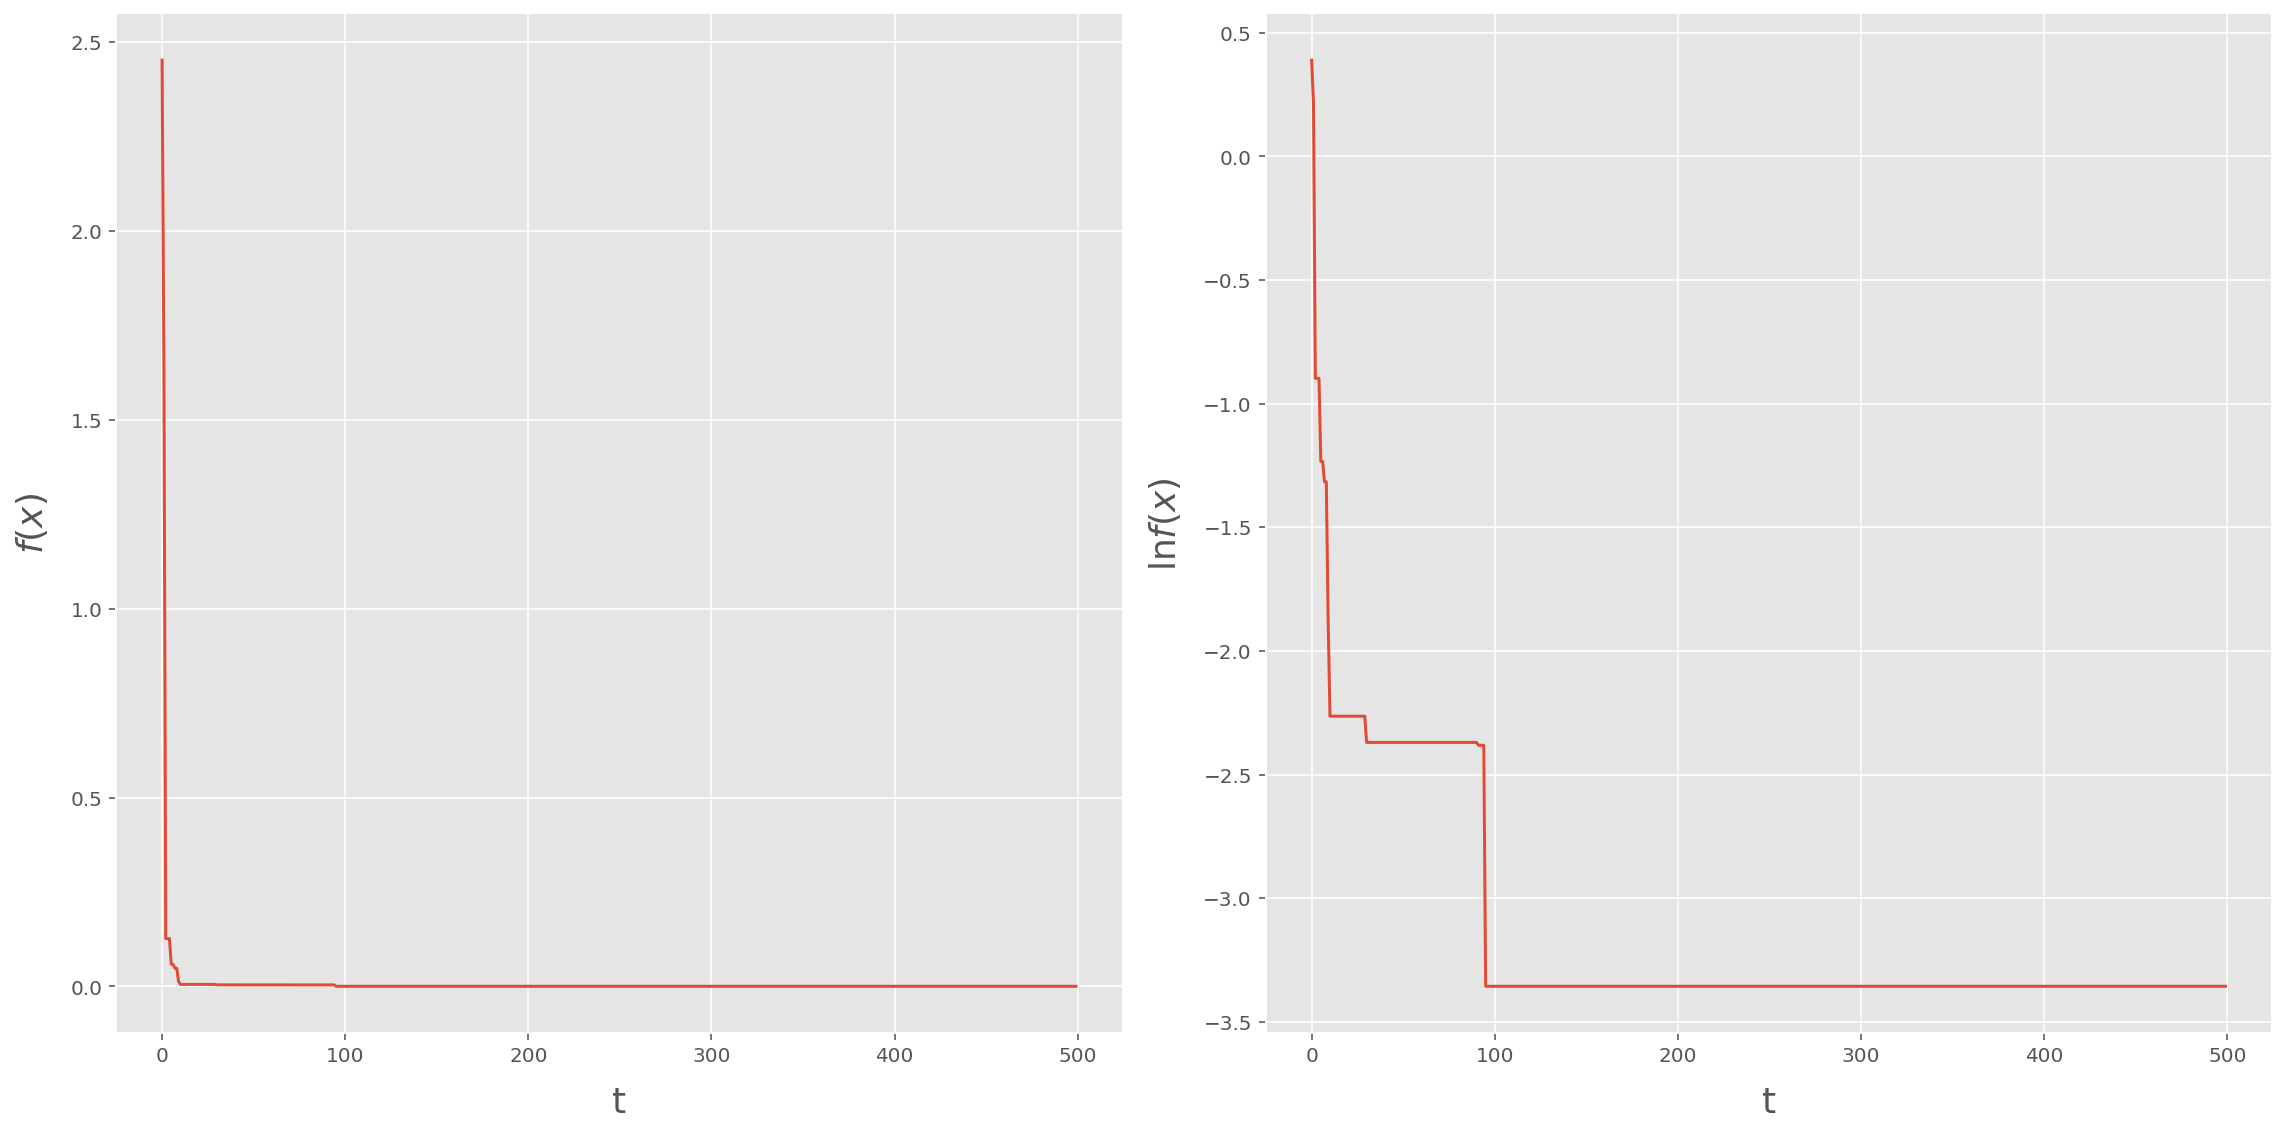

In [26]:
fig = plt.figure(figsize=(16, 8))

ax_0 = plt.subplot2grid((1, 6), (0, 0), colspan=3)
ax_1 = plt.subplot2grid((1, 6), (0, 3), colspan=3)

ax_0.spines["top"].set_visible(False)  
ax_0.spines["right"].set_visible(False)
ax_0.get_xaxis().tick_bottom()  
ax_0.get_yaxis().tick_left() 
ax_0.set_xlabel("t", fontsize=18, labelpad=10)  
ax_0.set_ylabel("$f(x)$", fontsize=18, labelpad=10)
ax_0.plot(a.best_target_value_history)

ax_1.spines["top"].set_visible(False)  
ax_1.spines["right"].set_visible(False)
ax_1.get_xaxis().tick_bottom()  
ax_1.get_yaxis().tick_left() 
ax_1.set_xlabel("t", fontsize=18, labelpad=10)
ax_1.set_ylabel("$\ln f(x)$", fontsize=18, labelpad=10)
ax_1.plot(np.log10(a.best_target_value_history))

fig.tight_layout()

## Задача коммивояжера

Вернемся к задаче коммивояжера (TSP), расмотренной нами ранее. Вспомним, что метод отжига — хоть и дал вполне приемлемый результат, — не смог найти самый оптимальный путь. Решим данную проблему посредством генетического алгоритма. Ко всему прочему, усложним TSP: будем искать оптимальный маршрут для 52 городов.


Создадим изначальную карту.

In [27]:
letters = [f'{chr(i)}' for i in range(65, 65 + 26)] + [f'{chr(i)}*' for i in range(65, 65 + 26)]  

In [28]:
class City:
    def __init__(self, coord, number):
        self.x = coord[0]
        self.y = coord[1]
        self.name = letters[number]
        
    def distance(self, city):
        return np.sqrt((self.x - city.x) ** 2 + (self.y - city.y) ** 2)
    
    def __repr__(self):
        return f'{self.name}: ({str(self.x)}; {self.y})'

In [29]:
def map_city(cities_num, cities_range):
    return [City(np.random.randint(1, cities_range, size=2), j) for j in range(cities_num)]

In [30]:
np.random.seed(13)
not_closed_road = map_city(len(letters), 2000)

In [31]:
closed_road = not_closed_road + [not_closed_road[0]]

In [32]:
def total_distance(path, cities_lst): # тождественно нашей целевой функции
    dist_lst = []
    for j in range(len(path) - 1):
        dist_lst.append(cities_lst[j].distance(cities_lst[j + 1]))
    dist_lst.append(cities_lst[j + 1].distance(cities_lst[0]))
    return sum(dist_lst)

In [33]:
path = [city.name for city in closed_road]
route_dist = total_distance(path=path, cities_lst=closed_road)

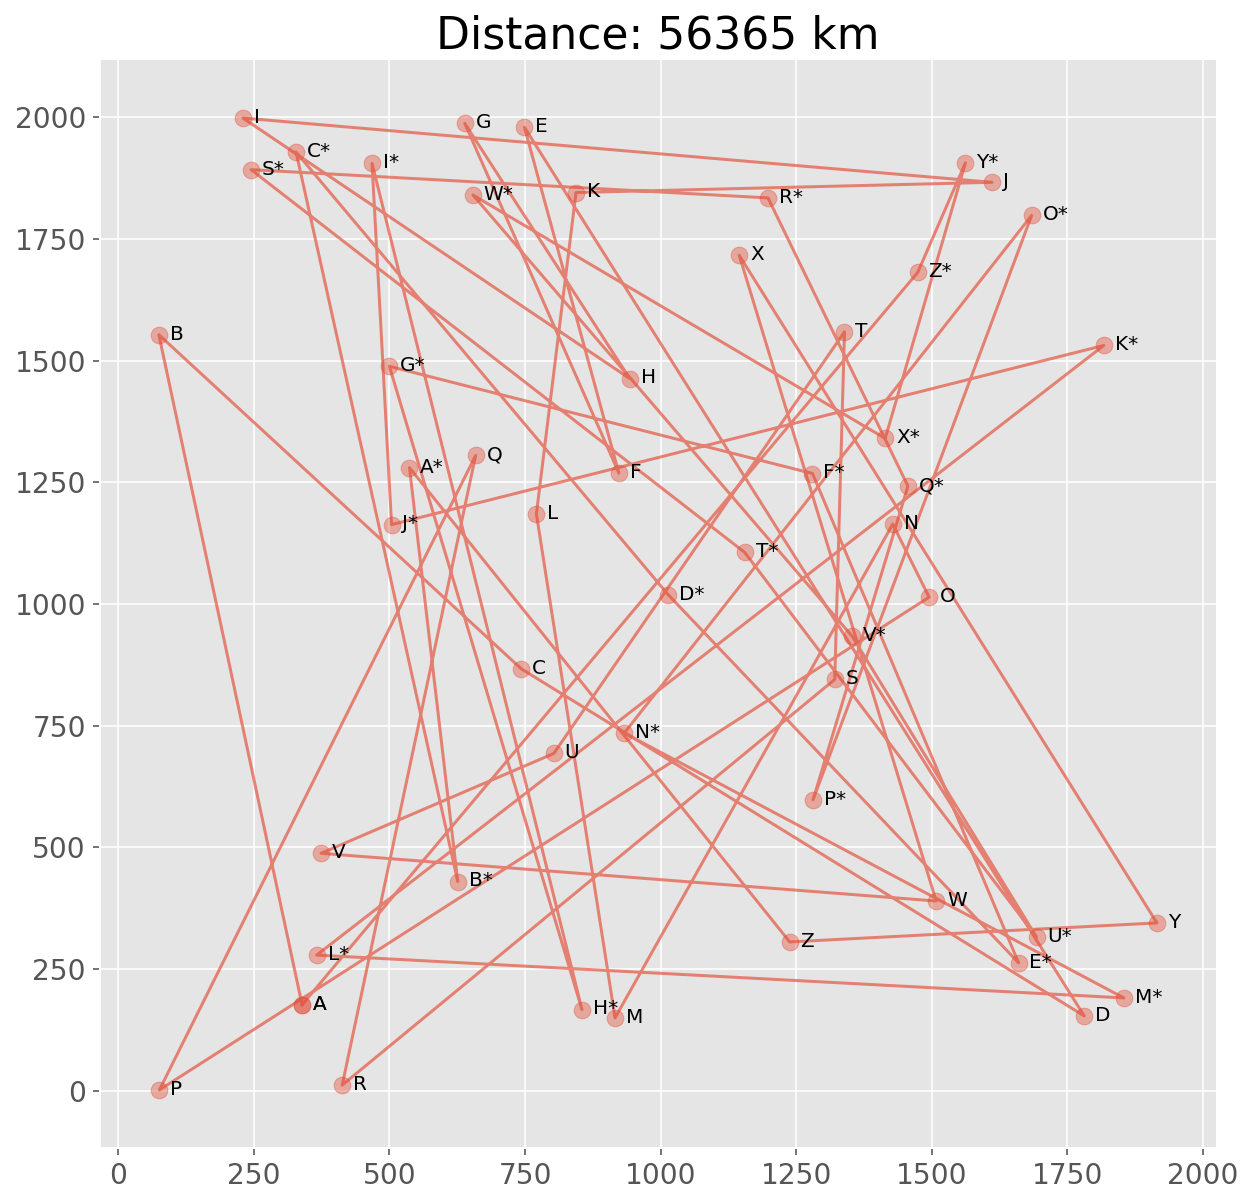

In [34]:
fig = plt.figure(figsize=(10,10))

# Удаляем лишние границы
ax = plt.subplot(111)  
ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False)
ax.get_xaxis().tick_bottom()  
ax.get_yaxis().tick_left() 

# Корректируем оси абсцисс и ординат
plt.xticks(fontsize=14)  
plt.yticks(fontsize=14) 

plt.title(f'Distance: {int(round(route_dist))} km', fontsize=22)
plt.plot([city.x for city in closed_road],
         [city.y for city in closed_road], alpha=0.65)
plt.scatter([city.x for city in closed_road], 
            [city.y for city in closed_road], s=70, marker='o', alpha=0.4)

for j in range(len(closed_road)):
    plt.text(closed_road[j].x + 20, closed_road[j].y - 10,  closed_road[j].name)

Реализуем генетический алгоритм.

In [35]:
class Individual:
    def __init__(self, cities_lst, id_of_individual):
        self.map = random.sample(cities_lst[:-1], len(cities_lst[:-1]))
        self.path = [city.name for city in self.map]
        self.id_of_individual = id_of_individual
        self.dist = None
        self.fitness = None
        
    def __repr__(self):
        return f'Individual {self.id_of_individual}: Distance = {int(round(self.dist))} km'

In [36]:
class GeneticAlgorithm:
    def __init__(self, ell, k, mutation_rate, inital_map, max_iter, 
                 make_gif=False, random_state=13):
        """
        PARAMETERS:
        ell - количество особей в поколении
        k - количество особей для размножения
        mutation_rate - коэффициент мутации
        max_iter - максимальное количество эволюций поколения (новых поколений)
        """
        self.ell = ell
        self.k = k
        self.mutation_rate = mutation_rate
        self.inital_map = inital_map
        self.max_iter = max_iter
        self.make_gif = make_gif
        self.random_state = random_state
        
        self.best_individuals = None # k наиболее приспособленных особей
        self.fittest_indivdual = None # самая приспособленная особь
        self.population = None
        self.best_target_value_history = []
        
    def search_best_path(self):        
        # создаем первое поколение
        self.population = self.create_population()
        
        # проходим этапы эволюции
        for i in tqdm(range(self.max_iter)):
            np.random.seed(self.random_state)
            
            # оцениваем приспособленность наших особей
            self.evaluate_population()
            # отбираем k наиболее наиболее приспособленных особей
            self.selection()
            self.best_target_value_history.append(self.fittest_indivdual.dist)
            
            # формируем новые поколения
            # скрещиваем особи
            for idx in range(self.k, self.ell):
                # случайно выбираем одну из наилучших особей
                select_fitted_individual = np.random.choice(self.best_individuals)
                # создаем потомка и заменяем им старую особь
                offspring = self.crossover(select_fitted_individual,
                                           self.population[idx])
                self.population[idx].map = offspring
            
            # мутируем все особи, кроме самой приспособленной
            for individual in self.population[1:]:
                self.mutate(individual)
            
            if self.make_gif:
                make_plot(self.fittest_indivdual, i)
            
        return self.fittest_indivdual

    def create_population(self):
        return [Individual(self.inital_map, i + 1) for i in range(self.ell)]
    
    def evaluate_population(self):
        F = []
        
        for individual in self.population:
            individual.dist = total_distance(individual.path + [individual.path[0]],
                                             individual.map + [individual.map[0]])
            F.append(individual.dist)
        
        for individual in self.population:
            individual.fitness = self.normalize(individual.dist,
                                                min(F), max(F))
            
    def normalize(self, z, F_best, F_worst):
        """
        INPUT:
        z - масштабируемое значение
        F_best - лучшее значение целевой функции
        F_worst - худшее значение целевой функции
        """
        return (z - F_worst) / (F_best - F_worst)
    
    def selection(self):
        """
        Оператор отбора
        """
        self.population = sorted(self.population,
                                 key=lambda individual: individual.fitness, reverse=True)
        self.best_individuals = self.population[:self.k]
        self.fittest_indivdual = self.population[0]
    
    def crossover(self, parent_fitted, parent_random):
        """
        Оператор скрещивания
        
        INPUT:
        parent_fitted - одна из самых приспособленных особей
        parent_random - случайная особь
        """
        genes_1 = int(np.random.uniform(0, 1) * len(parent_fitted.path))
        genes_2 = int(np.random.uniform(0, 1) * len(parent_fitted.path))
        
        start = min(genes_1, genes_2)
        end = max(genes_1, genes_2)
        
        if (end - start > self.ell / 2) and (np.random.uniform(0, 1) < parent_fitted.fitness):
            offspring_1 = parent_fitted.map[start:end]
            offspring_2 = [city for city in parent_random.map if city not in offspring_1]
        else:
            offspring_1 = parent_random.map[start:end]
            offspring_2 = [city for city in parent_fitted.map if city not in offspring_1]
    
        return offspring_1 + offspring_2
    
    def mutate(self, individual):
        """
        Оператор мутации
    
        INPUT:
        individual - особь, подвергающаяся мутации
        """
        for j in range(len(individual.path)):
            if np.random.uniform(0, 1) < self.mutation_rate:
                num = np.random.randint(len(individual.path))
                individual.map[j], individual.map[num] = individual.map[num], individual.map[j]

Инициализируем.

In [42]:
a = GeneticAlgorithm(ell=1500, k=150, mutation_rate=0.001, inital_map=closed_road, 
                     max_iter=1200, random_state=232, make_gif=False)

In [43]:
a.search_best_path()

100%|██████████| 1200/1200 [28:41<00:00,  1.43s/it]


Individual 355: Distance = 11236 km

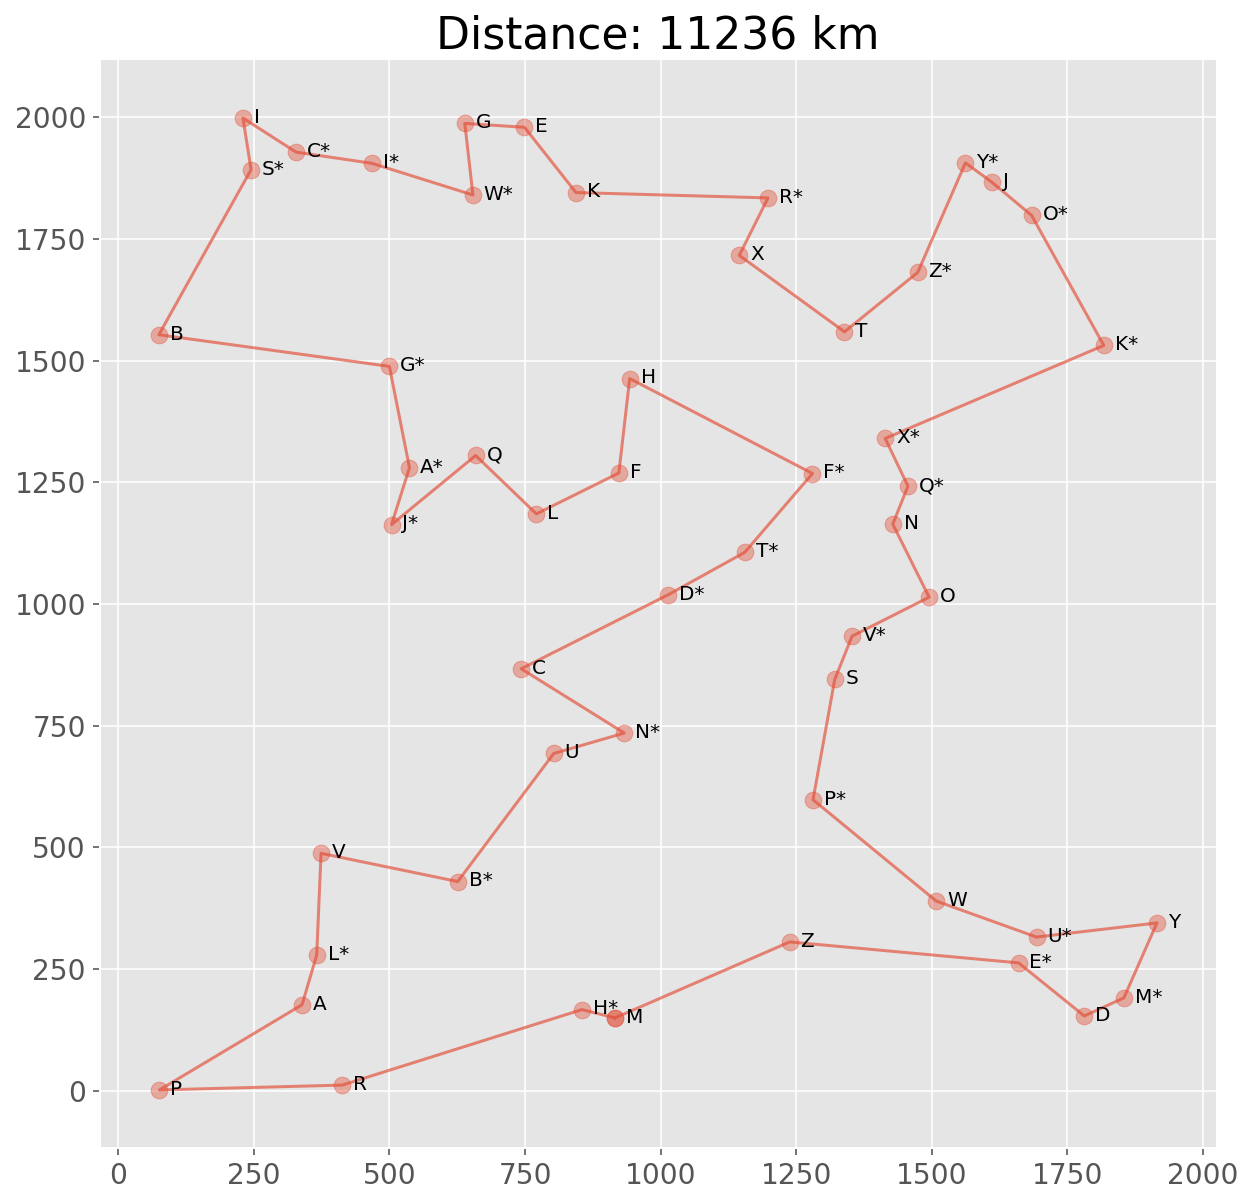

In [44]:
ans = a.fittest_indivdual.map + [a.fittest_indivdual.map[0]]

fig = plt.figure(figsize=(10,10))

# Удаляем лишние границы
ax = plt.subplot(111)  
ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False)
ax.get_xaxis().tick_bottom()  
ax.get_yaxis().tick_left() 

# Корректируем оси абсцисс и ординат
plt.xticks(fontsize=14)  
plt.yticks(fontsize=14) 

plt.title(f'Distance: {int(round(a.fittest_indivdual.dist))} km', fontsize=22)
plt.plot([city.x for city in ans],
         [city.y for city in ans], alpha=0.65)
plt.scatter([city.x for city in ans], 
            [city.y for city in ans], s=70, marker='o', alpha=0.4)

for j in range(len(a.fittest_indivdual.map)):
    plt.text(a.fittest_indivdual.map[j].x + 20, a.fittest_indivdual.map[j].y - 10, a.fittest_indivdual.map[j].name)